In [113]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Read Data

In [114]:
# Descomentar esto en Linux
#path = '/mnt/Andrew/Documents/Maestria Uniandes/Deep learning/Proyecto Kaggle 2'
# Descomentar esto en Windows
path = 'D:\Documents\Maestria Uniandes\Deep learning\Proyecto Kaggle 2'
os.chdir(path)

In [115]:
dataTraining = pd.read_csv('dataTraining.csv', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('dataTesting.csv', encoding='UTF-8', index_col=0)

In [116]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [117]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


# Create y

In [118]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [119]:
y_genres.shape

(7895, 24)

# Create count vectorizer with ngrams

In [120]:
vect = TfidfVectorizer(stop_words="english",ngram_range=(1, 2), max_features=2000)
X2= vect.fit_transform(dataTraining['plot'])
X2.shape

(7895, 2000)

In [121]:
print(vect.get_feature_names()[:50])

['aaron', 'abandoned', 'abby', 'abducted', 'ability', 'able', 'aboard', 'abusive', 'academy', 'accept', 'accepts', 'access', 'accident', 'accidentally', 'account', 'accused', 'achieve', 'act', 'acting', 'action', 'actions', 'activities', 'actor', 'actress', 'acts', 'actually', 'adam', 'addition', 'adolescent', 'adopted', 'adult', 'adventure', 'adventures', 'advice', 'affair', 'affected', 'afraid', 'africa', 'african', 'age', 'aged', 'agency', 'agent', 'agents', 'aging', 'ago', 'agree', 'agrees', 'ahead', 'aid']


# Split train and test

In [122]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X2, y_genres, test_size=0.20, random_state=5)

In [123]:
X_train.shape

(6316, 2000)

In [124]:
X_train[0]

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 57 stored elements in Compressed Sparse Row format>

# Train neural network

In [126]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import History
from livelossplot import PlotLossesKeras

In [137]:
modeltx = Sequential()
modeltx.add(Dense(768,input_shape=(2000,)))
modeltx.add(Activation('relu'))
modeltx.add(Dense(2048))
modeltx.add(Activation('relu'))
modeltx.add(Dense(24))
modeltx.add(Activation('softmax'))
modeltx.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.00002),metrics=['accuracy'])
modeltx.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 768)               1536768   
_________________________________________________________________
activation_90 (Activation)   (None, 768)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 2048)              1574912   
_________________________________________________________________
activation_91 (Activation)   (None, 2048)              0         
_________________________________________________________________
dense_92 (Dense)             (None, 24)                49176     
_________________________________________________________________
activation_92 (Activation)   (None, 24)                0         
Total params: 3,160,856
Trainable params: 3,160,856
Non-trainable params: 0
_________________________________________________________________


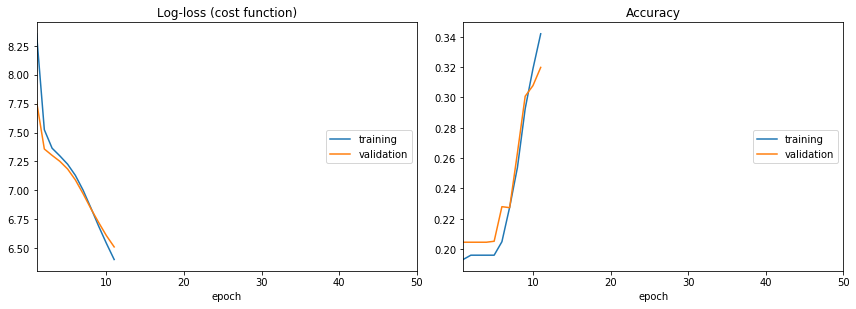

Epoch 12/50
3232/6316 [==============>...............] - ETA: 7s - loss: 6.3852 - acc: 0.3598

In [ ]:
history=History()
modeltx.fit(X_train, y_train_genres, epochs=50,callbacks=[history,PlotLossesKeras()],validation_data=(X_test,y_test_genres))

In [ ]:
y_pred_genres = modeltx.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

In [111]:
#from keras.utils import plot_model
#plot_model(modeltx,show_shapes=True,show_layer_names=True,to_file="D:\Documents\Maestria Uniandes\Deep learning\Proyecto Kaggle 2\modelo_texto.png")

In [112]:
#from IPython.display import Image
#Image("D:\Documents\Maestria Uniandes\Deep learning\Proyecto Kaggle 2\modelo_texto.png")

# Apply models to kaggle test

In [ ]:
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = modeltx.predict_proba(X_test_dtm)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_text2_RF.csv', index_label='ID')